# 1. Import packages

In [3]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *

# 2. Generate dataset

In [4]:
#Generate example dataset (random)
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

# Test the row / col orders

              AB CD EF         F
sample1   AAAA1   C  E -0.603085
sample2   AAAA1   C  E -1.594917
sample3   AAAA1   C  E  0.950033
sample4   AAAA1   D  E -0.842763
sample5   AAAA1   D  E  0.309204
sample6   BBBBB2  D  E -0.406058
sample7   BBBBB2  G  F  0.238501
sample8   BBBBB2  G  F  0.897888
sample9   BBBBB2  G  H  1.985105
sample10  BBBBB2  G  H  1.205365
        sample1   sample2   sample3   sample4   sample5   sample6   sample7  \
Fea1   0.600193 -0.727020  0.086206  1.379406 -1.620085  0.046288 -0.168688   
Fea2  -1.219673  0.218221 NaN       -0.217202 -0.327069  0.957839  1.794292   
Fea3   0.311951  0.665270  1.562498 -0.181721  0.269504  0.878320  0.846672   
Fea4   0.493756 -0.818775 -0.557343  2.043837 -0.447664 -1.024816  0.109516   
Fea5   0.756437 -1.712609 -1.604561 -0.785030 -1.092026 -1.764963  1.280893   
...         ...       ...       ...       ...       ...       ...       ...   
Fea26 -0.079259  0.443476  0.294282  0.012895 -0.047314 -1.237721  0.155901   
Fea27

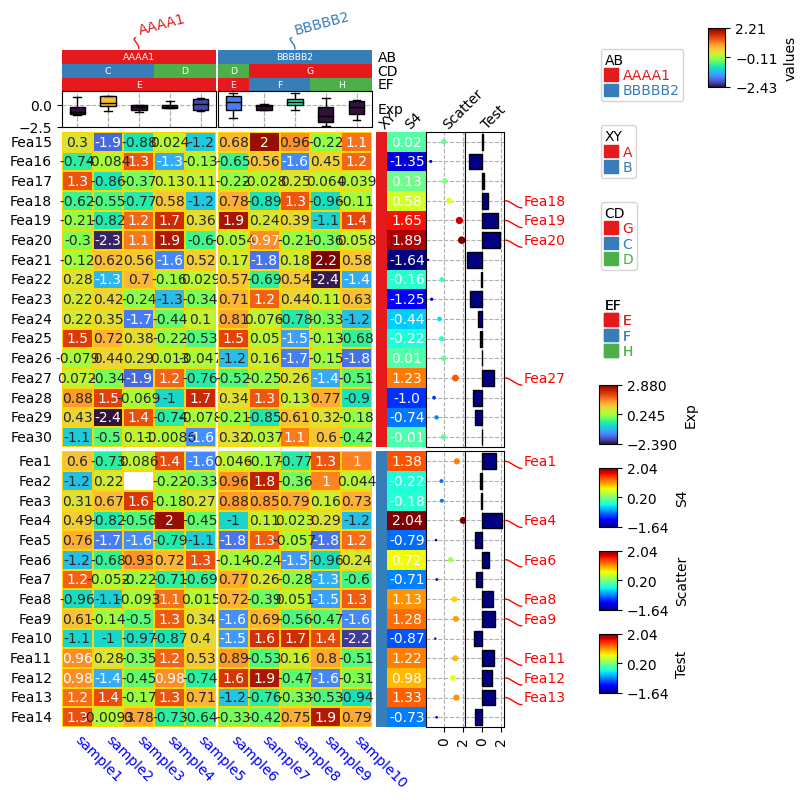

[['Fea15', 'Fea16', 'Fea17', 'Fea18', 'Fea19', 'Fea20', 'Fea21', 'Fea22', 'Fea23', 'Fea24', 'Fea25', 'Fea26', 'Fea27', 'Fea28', 'Fea29', 'Fea30'], ['Fea1', 'Fea2', 'Fea3', 'Fea4', 'Fea5', 'Fea6', 'Fea7', 'Fea8', 'Fea9', 'Fea10', 'Fea11', 'Fea12', 'Fea13', 'Fea14']]
[['sample1', 'sample2', 'sample3', 'sample4', 'sample5'], ['sample6', 'sample7', 'sample8', 'sample9', 'sample10']]


In [5]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(XY=anno_simple(df_rows.XY),
                            S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                           add_text=True,height=10,
                                           text_kws={'rotation':0,'fontsize':10,'color':'black'}),
                           Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=10),
                           Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=10),
                           selected=anno_label(df_rows,colors='red'),
                           axis=0,verbose=0,label_kws={'rotation':45})

col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                           AB=anno_simple(df.AB,add_text=True),axis=1,
                           CD=anno_simple(df.CD,add_text=True),
                           EF=anno_simple(df.EF,add_text=True,
                                            legend_kws={'frameon':False}),
                           Exp=anno_boxplot(df_box, cmap='turbo'),
                           verbose=0) #verbose=0 will turn off the log.

print(df)
print(df_heatmap)
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
                       col_split=df.AB,row_split=df_rows.XY, col_split_gap=0.5,row_split_gap=1,
                       col_cluster=False,row_cluster=False,
                       label='values',row_dendrogram=False,show_rownames=True,show_colnames=True,
                         tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=7,
                       annot=True,linewidths=0.05,linecolor='gold',cmap='turbo',
                      xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()
print(cm.row_order)
print(cm.col_order)

In [6]:
df_rows

,Selected,XY
Fea1,Fea1,B
Fea2,None,B
Fea3,None,B
Fea4,Fea4,B
Fea5,None,B
...,...,...
Fea26,None,A
Fea27,Fea27,A
Fea28,None,A
Fea29,None,A
